# Les fonctions de bases pour l'évaluation des modèles de classification et régression : 

# 1. Classification : 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## sklearn module : 
from sklearn import model_selection 
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import metrics
data_path = "~/Documents/openclassroom/Fomation_ingenieur_ML/data/"

## 1.1 The different criteria and curves : 

I recall the code of the KNN classification used in the first part of the module : 

In [75]:
df = pd.read_csv(data_path+'winequality-red+.csv', sep=";")
## DESIGN AND SAMPLING : 
X = df.drop("quality", axis = 1, inplace = False)
threshold = np.floor(df.quality.mean())
y = np.where(df.quality <= threshold, 0,1) 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7)

## STANDARDIZATION : 
my_normalizer = preprocessing.StandardScaler().fit(X_train)
X_train_std = pd.DataFrame(my_normalizer.transform(X_train), index = X_train.index, columns = X_train.columns)
X_test_std = pd.DataFrame(my_normalizer.transform(X_test), index = X_test.index, columns = X_test.columns)

## CROSS VALIDATION :
param_grid = {"n_neighbors" : np.arange(8,14,1)}
nb_folds = 5
CV_clf = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(), param_grid, 
                                      cv=nb_folds, scoring = "accuracy")
CV_clf.fit(X_train_std, y_train)

kwargs = CV_clf.best_params_

And I call the best parameters that I train on whole X_train : 

In [76]:
clf = neighbors.KNeighborsClassifier(**kwargs)
clf.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=11)

### Confusion Matrix : 
Let us look at the confusion matrix : 

In [77]:
y_true = y_test
y_pred = clf.predict(X_test_std)
metrics.confusion_matrix(y_true, y_pred)

array([[174,  61],
       [ 57, 188]])

### ROC Curve :

And let's see the ROC curve, that is sensibility in function of 1 - specificity

$$ sensibility = recall = \frac{TP}{TP+FN} $$

$$ specificy = \frac{TN}{FP+TN}$$

In [78]:
# help(neighbors.KNeighborsClassifier.predict_proba)

Text(0.5, 1.0, 'ROC Curve')

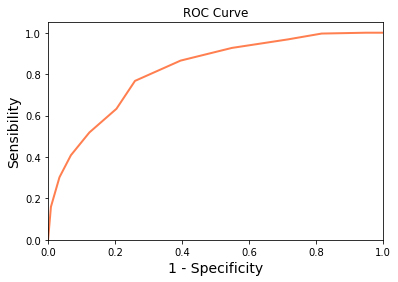

In [79]:
y_pred_proba = clf.predict_proba(X_test_std)[:, 1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity', fontsize=14)
plt.ylabel('Sensibility', fontsize=14)    
plt.title("ROC Curve")

We use it commonly the AUC criteria, implemented : 

In [80]:
print(metrics.auc(fpr, tpr))

0.8180547112462007


In [81]:
# indice du premier seuil pour lequel
# la sensibilité est supérieure à 0.95
idx = np.min(np.where(tpr > 0.95)) 

print("Sensibilité : {:.2f}".format(tpr[idx]))
print("Spécificité : {:.2f}".format(1-fpr[idx]))
print("Seuil : {:.2f}".format(thr[idx]))

Sensibilité : 0.97
Spécificité : 0.29
Seuil : 0.27


### PR Curve : 

Text(0, 0.5, 'Precision')

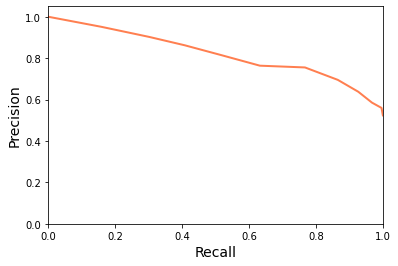

In [82]:
[precision, recall, threshold] = metrics.precision_recall_curve(y_test, y_pred_proba)

plt.plot( recall, precision, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)    

## 1.2 Naive classifiers :

The naive classifer can be “stratified”, “most_frequent”, “prior”, “uniform”, “constant”, and they are all in the sklearn.dummy.DummyClassifier method, and the choice of naive classifier is set with the "strategy" argument : 

In [83]:
from sklearn import dummy
# strategy{“stratified”, “most_frequent”, “prior”, “uniform”, “constant”}, 
#     default=”prior”
# dir(dummy.DummyClassifier)

dum_clf = dummy.DummyClassifier(strategy = "most_frequent")
dum_clf.fit(X_train,y_train)
# dum_clf.predict(X_test)

DummyClassifier(strategy='most_frequent')

# 2. Regression : 

Let's make a regression using the KNN on the quality of the wine : 


In [110]:
df = pd.read_csv(data_path+'winequality-red+.csv', sep=";")
## DESIGN AND SAMPLING : 
X = df.drop("quality", axis = 1, inplace = False)
y = df.quality
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7)

## STANDARDIZATION : 
my_normalizer = preprocessing.StandardScaler().fit(X_train)
X_train_std = pd.DataFrame(my_normalizer.transform(X_train), index = X_train.index, columns = X_train.columns)
X_test_std = pd.DataFrame(my_normalizer.transform(X_test), index = X_test.index, columns = X_test.columns)

## CROSS VALIDATION :
param_grid = {"n_neighbors" : np.arange(8,14,1)}
nb_folds = 5
CV_reg = model_selection.GridSearchCV(neighbors.KNeighborsRegressor(),
                                      param_grid, cv=nb_folds)
CV_reg.fit(X_train_std, y_train)

## KNN REGRESSOR WITH THE BEST CV n_neighbors
knn_reg = neighbors.KNeighborsRegressor(**CV_reg.best_params_)
knn_reg.fit(X_train_std, y_train)

## PREDICTION : 
y_pred = knn.predict(X_test_std)

KNeighborsRegressor(n_neighbors=13)


## 2.1 Error Measure :

Recall of the main measures : 
#### Residual Sum of Square : 
$$ RSS =  \sum^n_{i=1} (f(x_i) - y_i)^2  $$

#### Mean Square Error : 
$$ MSE = \frac{1}{n} \sum^n_{i=1} (f(x_i) - y_i)^2 $$

#### Root Mean Square Error : 
$$ RMSE = \sqrt{ \frac{1}{n} \sum^n_{i=1} (f(x_i) - y_i)^2 } $$

#### Root Mean Squared Log Error
$$ RMSE = \sqrt{ \frac{1}{n} \sum^n_{i=1} (log(f(x_i)+1) - log(y_i+1) )^2 } $$

#### Relative Squared Log Error
$$ RSE = \frac{\sum^n_{i=1} (f(x_i) - y_i)^2 }{\sum^n_{i=1} (y_i - \bar{y})^2 }$$

#### Pearson Correlation/ coefficient of determination : 
$$ R^2 = 1 - RSE $$ 

In [116]:
## RMSE
print("RMSE : {:.2f}".format(np.sqrt( metrics.mean_squared_error(y_test, y_pred) )))

RMSE : 0.62


[]

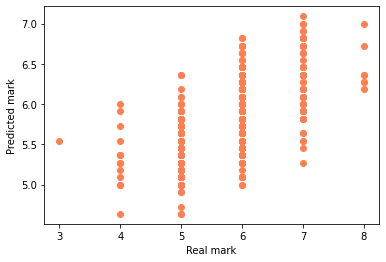

In [115]:
plt.scatter(y_test, y_pred, color='coral')
plt.xlabel("Real mark")
plt.ylabel("Predicted mark")
plt.plot()

[]

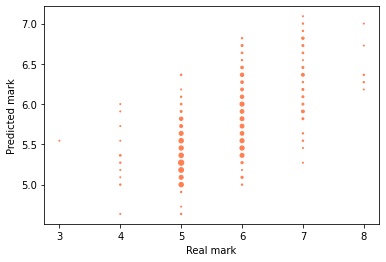

In [248]:
y_pred_round = y_pred#np.round(y_pred,2)
all_y = pd.DataFrame(np.array((y_test,y_pred_round)).T, columns = ["real","pred"])
# tmp.pivot_table(index=["real","pred"], aggfunc='size')
tmp = all_y.value_counts().reset_index()
tmp = tmp.rename({0:"nb"},axis='columns')


plt.scatter(tmp.real, tmp.pred, s = tmp.nb, color='coral')
plt.xlabel("Real mark")
plt.ylabel("Predicted mark")
plt.plot()

## 2.2 Comparison with dummies :


#### Random Regressor

In [249]:
y_pred_random = np.random.randint(np.min(y), np.max(y), y_test.shape)
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_random))))

RMSE : 1.84


#### Dummies Regressors :

In [255]:
from sklearn import dummy
dum = dummy.DummyRegressor(strategy='mean')
dum.fit(X_train_std, y_train)
y_pred_dum = dum.predict(X_test_std)

print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dum)) ))

RMSE : 0.80
